In [17]:
%reset -f 

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import preprocessing 
from sklearn import metrics
%matplotlib inline

In [19]:
#Leer Los datos
df_train = pd.read_csv("data/train.csv", index_col="PassengerId")
df_test = pd.read_csv("data/test.csv", index_col="PassengerId")

In [20]:
#Borrar Variables
df_train.drop(columns=["Name","Cabin","Ticket"], inplace=True);
df_test.drop(columns=["Name","Cabin","Ticket"], inplace=True);

In [21]:
#Convertir a tipos de variable adecuados 
df_train.convert_dtypes();
df_test.convert_dtypes();

In [22]:
# Rellenar o Borrar valores NAN

df_train.fillna(df_train.median(), inplace=True)
#df_train.dropna(inplace=True)
df_test.fillna(df_train.median(), inplace=True)


In [23]:
#Reducir dimensionalidad encontrado correlación de variables
df_train["Family_members"] = df_train["SibSp"] + df_train["Parch"]
df_test["Family_members"] = df_test["SibSp"] + df_test["Parch"]
df_train.drop(columns=["SibSp","Parch"], inplace=True);
df_test.drop(columns=["SibSp","Parch"], inplace=True);

In [24]:
#Categorizar variables  (Sex y Embarked)
df_train[["Sex"]] = df_train[["Sex"]].astype("category")
df_test[["Sex"]] = df_test[["Sex"]].astype("category")

df_train[["Embarked"]] = df_train[["Embarked"]].astype("category")
df_test[["Embarked"]] = df_test[["Embarked"]].astype("category")

# Obtener dummis de variables categoricas 
df_train[["IsWomen","IsMan"]] = pd.get_dummies(df_train[["Sex"]])
df_test[["IsWomen","IsMan"]] = pd.get_dummies(df_test[["Sex"]])

df_train[["IsC","IsQ","IsS"]] = pd.get_dummies(df_train[["Embarked"]])
df_test[["IsC","IsQ","IsS"]] = pd.get_dummies(df_test[["Embarked"]])

# Borrar Dummies Sobrantes y Variables Categoricas Originales 
df_train.drop(columns=["IsMan","Sex","IsQ","Embarked"], inplace=True);
df_test.drop(columns=["IsMan","Sex","IsQ","Embarked"], inplace=True);

In [25]:
#Agrupar datos numericos 

#( ] ( ] ( ] ( ] ( ]

#0.8061
bins = [-10, 0, 5, 12, 32, 60, 100]
names = [1, 2, 3, 4, 5, 6] 

#Age 
df_train["Age"]=pd.cut( df_train["Age"], bins =bins, labels = names)
df_test["Age"]=pd.cut( df_test["Age"], bins =bins, labels = names )

df_train["Age"]=df_train.Age.astype('category').cat.codes
df_test["Age"]=df_test.Age.astype('category').cat.codes


In [26]:
df_train.Age.value_counts()

#df_train[df_train.Age==1]

3    554
4    246
1     44
2     25
5     22
Name: Age, dtype: int64

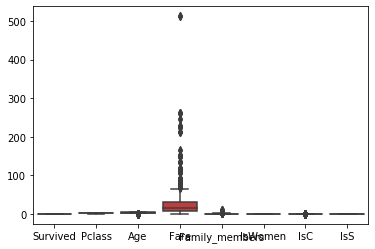

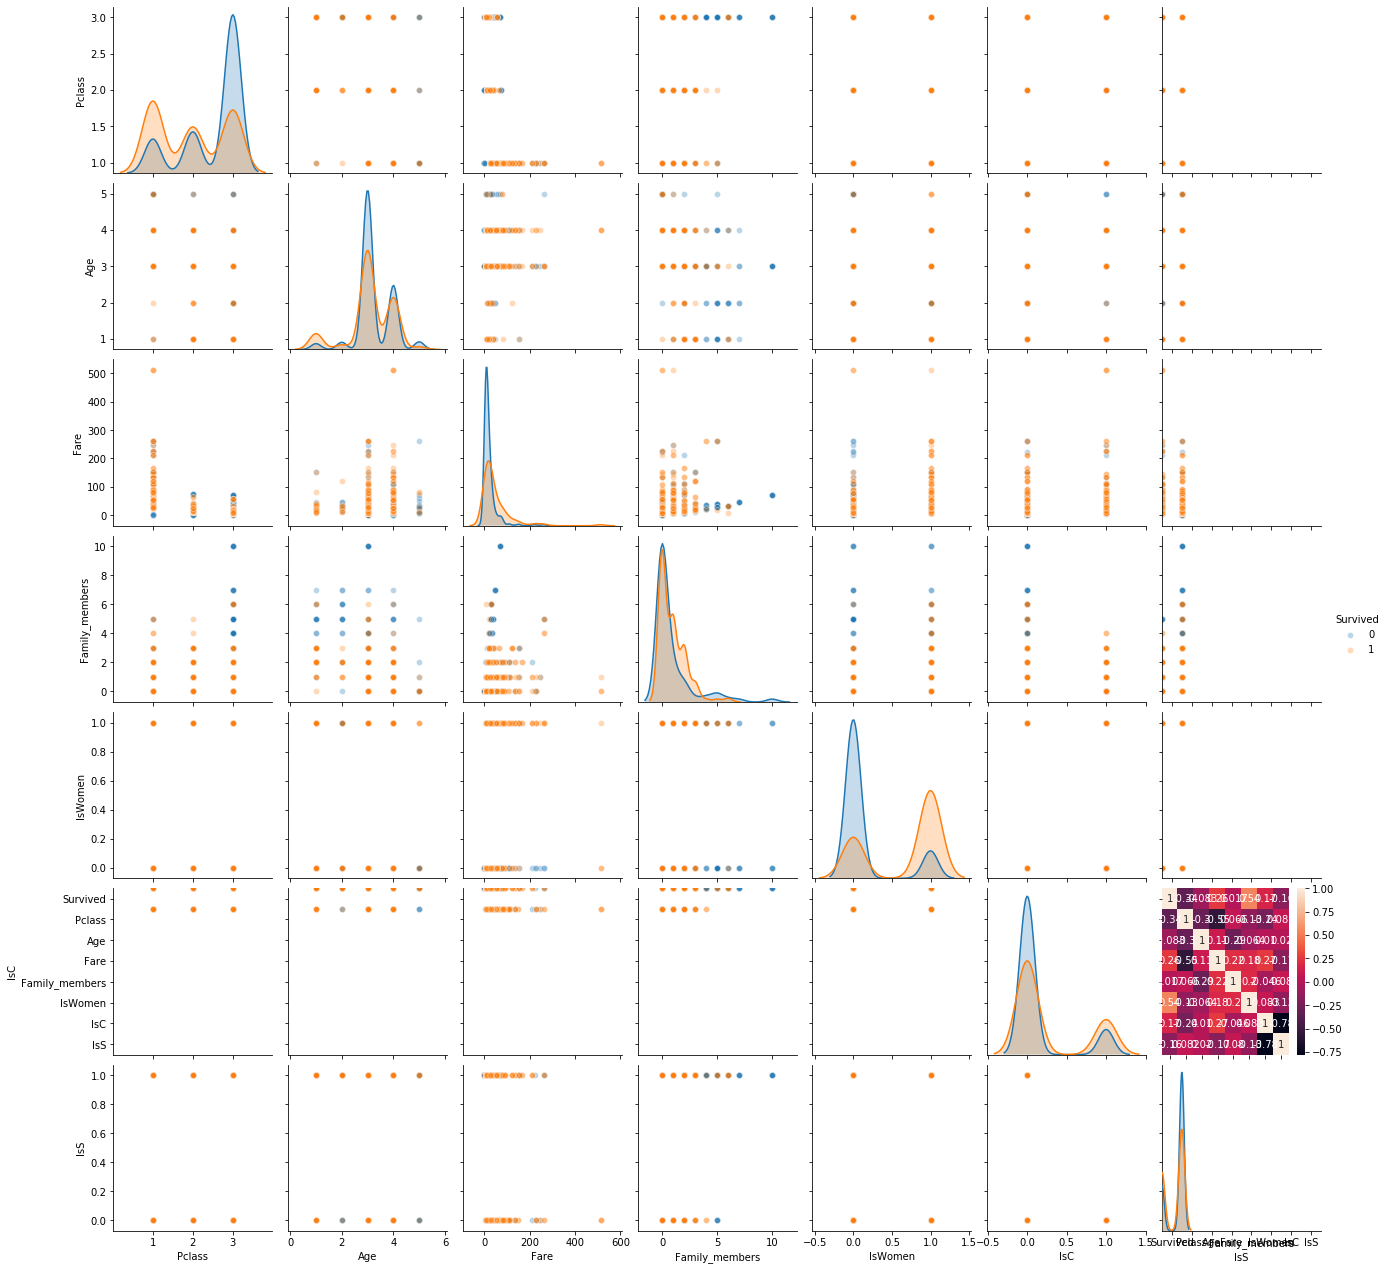

In [27]:
#Graficas

#BoxPlot
sns.boxplot(data = df_train._get_numeric_data())
 
#pair map
sns.pairplot(df_train, hue="Survived", plot_kws={'alpha':0.3} )


In [ ]:
#Graficas
# corr 
corr= df_train._get_numeric_data().corr()
sns.heatmap(corr, yticklabels = corr.columns, xticklabels = corr.columns,  annot=True)

In [28]:
# Machine Learning

# X = Features Y = Target 
X = df_train.drop(columns=['Survived'])
Y = df_train['Survived']


In [32]:
Classifiers_dict = {    "RandomForest"          :RandomForestClassifier(),
                        "GradientBoosting"      :GradientBoostingClassifier(),
                        "KNeighborsClassifier"  :KNeighborsClassifier(),
                        "DecisionTreeClassifier":DecisionTreeClassifier(),
                    } 

In [33]:
for  Name, Classifier  in Classifiers_dict.items():
    print(Name)
    print()
    CrossResults = cross_validate(Classifier, X, Y, cv=5, return_train_score=True)
    print (f"Train Mean = {np.mean(CrossResults['train_score'])}")
    print (f"Test Mean = {np.mean(CrossResults['test_score'])}" )
    print (f"Train MAX = {np.max(CrossResults['train_score'])}")
    print (f"Test MAX = {np.max(CrossResults['test_score'])}" )
    
    estimator = Classifier.fit(X,Y)
    Y_test=estimator.predict(df_test)


    try :
        print (list(zip(X, np.round(estimator.feature_importances_,decimals=4))))
    except:
        pass

    df_salida = df_test.copy(deep=True)
    df_salida['Survived'] = Y_test
    df_salida.to_csv(f"data/Prediction_Titanic_{Name}_.csv", index=True, columns=["Survived"])

    print("---"*100)


RandomForest

Train Mean = 0.9413563515451407
Test Mean = 0.8170924612390937
Train MAX = 0.9467040673211781
Test MAX = 0.848314606741573
[('Pclass', 0.1005), ('Age', 0.0927), ('Fare', 0.3828), ('Family_members', 0.0933), ('IsWomen', 0.2947), ('IsC', 0.0165), ('IsS', 0.0195)]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
GradientBoosting

Train Mean = 0.8928156074191973
Test Mean = 0.8294269035214363
Train MAX = 0.908835904628331
Test MAX = 0.8820224719101124
[('Pclass', 0.1421), ('Age', 0.0729), ('Fare', 0.1934), ('Family_members', 0.0884), ('IsWomen', 0.4858), ('IsC', 0.0031), ('IsS', 0.0143)]
-----------------------------------------------------------------------------------------------------------------------------------------------